# AI-Hub 건물 균열 탐지 이미지 살펴보기

In [19]:
import os
from glob import glob
from shutil import copyfile
import json

import json5
from pycocotools.coco import COCO

import matplotlib.pyplot as plt

import cv2

In [2]:
os.getcwd()

'/Users/a16/Desktop/JJ/soteria8-crack-detection/examples/aihub_crack/data_preprocess'

In [3]:
data_dir = '../../../data/aihub_structure_crack/1117/'

In [4]:
# 백태누수 4/5, 철근 노출 3 1차 분류

bleeding_image_paths = sorted(glob(os.path.join(data_dir, 'images/bleeding/*.tiff')))
er_image_paths = sorted(glob(os.path.join(data_dir, 'images/er/*.tiff')))

print(f'# of bleeding images : {len(bleeding_image_paths)}')
print(f'# of 철근 노출 images : {len(er_image_paths)}')

# of bleeding images : 202
# of 철근 노출 images : 3560


In [5]:
bleeding_label_paths = sorted(glob(os.path.join(data_dir, 'labels/bleeding/*.json')))
er_label_paths = sorted(glob(os.path.join(data_dir, 'labels/er/*.json')))

print(f'# of bleeding labels : {len(bleeding_label_paths)}')
print(f'# of 철근 노출 labels : {len(er_label_paths)}')

# of bleeding labels : 60887
# of 철근 노출 labels : 28126


In [6]:
sample_image_path = bleeding_image_paths[0]
sample_image_name = os.path.basename(sample_image_path).split('.')[0]
sample_image_name

'103_0079e8d2-d951-4ed3-80f7-c069b26afcb1'

In [7]:
bleeding_label_basename = list(map(lambda x : os.path.basename(x), bleeding_label_paths))

In [8]:
if f'{sample_image_name}.json' in bleeding_label_basename:
    print('yes')
    print(sample_image_name)

yes
103_0079e8d2-d951-4ed3-80f7-c069b26afcb1


In [9]:
f'{sample_image_name}.json'

'103_0079e8d2-d951-4ed3-80f7-c069b26afcb1.json'

In [10]:
sample_coco_path = sample_image_path.replace('tiff', 'json').replace('image', 'label')
sample_coco_path

'../../../data/aihub_structure_crack/1117/labels/bleeding/103_0079e8d2-d951-4ed3-80f7-c069b26afcb1.json'

In [11]:
# json format에 맞지 않아 열리지 않는다.
with open(sample_coco_path, 'r') as sample_coco:
    sample_coco = json.load(sample_coco)
    print(sample_coco)

JSONDecodeError: Expecting property name enclosed in double quotes: line 51 column 4 (char 896)

In [12]:
# pycocotools에서도 에러 발생
anns = COCO(sample_coco_path)

loading annotations into memory...


JSONDecodeError: Expecting property name enclosed in double quotes: line 51 column 4 (char 896)

In [13]:
# json5를 이용해 해결
# https://pypi.org/project/json5/
with open(sample_coco_path, 'r') as sample_coco:
    sample_coco = json5.load(sample_coco)
    print(sample_coco['images'])
    print(sample_coco['annotations'])
    print(len(sample_coco['annotations']))

[{'id': 997, 'width': 2560, 'height': 1440, 'file_name': '103_0079e8d2-d951-4ed3-80f7-c069b26afcb1.tiff', 'license': '1', 'date_captured': '2020-10-30 14:58:43'}]
[{'id': 2522, 'image_id': 997, 'category_id': 1, 'area': 43103.89200000003, 'bbox': [1050.24, 129.1, 133.16, 323.7], 'attributes': {'class': 'Efflorescene', 'facility': 'wall', 'lat': 36.9, 'lon': 127.9}}, {'id': 2523, 'image_id': 997, 'category_id': 1, 'area': 64598.2, 'bbox': [1331.6, 484.0, 173.0, 373.4], 'attributes': {'class': 'Efflorescene', 'facility': 'wall', 'lat': 36.9, 'lon': 127.9}}]
2


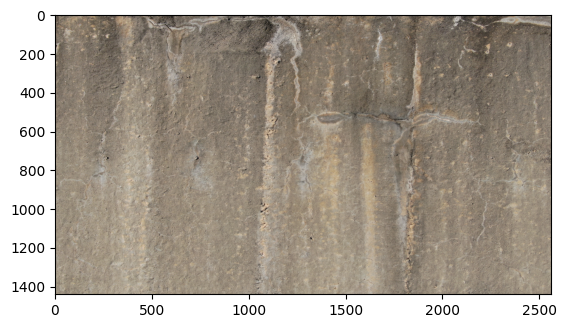

In [23]:
img = cv2.imread(sample_image_path, cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

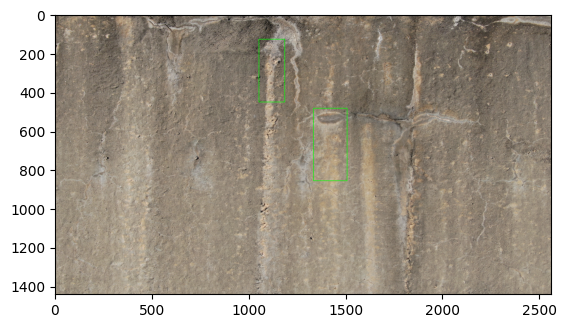

In [24]:
# bbox: [1050.24, 129.1, 133.16, 323.7]
# bbox: [1331.6, 484.0, 173.0, 373.4]
with open(sample_coco_path, 'r') as sample_coco:
    sample_coco = json5.load(sample_coco)

    image_info = sample_coco['images'][0]
    annotations_infos = sample_coco['annotations']

    for ann in annotations_infos:
        x_min, y_min, width, height = map(int, ann['bbox'])
        x_max = x_min + width
        y_max = y_min + height

        start_point = (x_min, y_min)
        end_point = (x_max, y_max)

        cv2.rectangle(img, start_point, end_point, color=(0, 255, 0), thickness=2)

plt.imshow(img)
plt.show()        